In [1]:
#import netCDF4 as nc
import pandas as pd
#import pandasql as ps
import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

# 1) gpi.grb

Dati giornalieri, uno per ciascuna combinazione latitudine-longitudine (10.512 diverse, granularità 2.5 gradi).
Ho plottato tutti i giorni del 2020 all'equatore (punto 0,0).
6 Variabili: vo, r, u (850), u(200), v(850), v(200).


Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file


                               number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
2020-01-01  90.0    -180.0          0 0 days          850.0 2020-01-01   
                    -177.5          0 0 days          850.0 2020-01-01   
                    -175.0          0 0 days          850.0 2020-01-01   
                    -172.5          0 0 days          850.0 2020-01-01   
                    -170.0          0 0 days          850.0 2020-01-01   
...                               ...    ...            ...        ...   
2020-12-31 -90.0     167.5          0 0 days          850.0 2020-12-31   
                     170.0          0 0 days          850.0 2020-12-31   
                     172.5          0 0 days          850.0 2020-12-31   
                     175.0          0 0 days          850.0 2020-12-31   
                     177.5          0 0 days          850.0 2020-12-31   

                                     

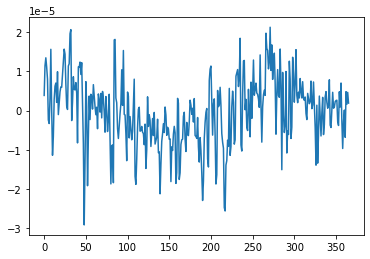

In [2]:
ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
#ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb")
gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())
print(gpi_bidim.isobaricInhPa.unique())

ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'vo'}})
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','vo']]
res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.vo!=10512])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'vo'].reset_index(drop=True))

Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file


                               number   step  isobaricInhPa valid_time  \
time       latitude longitude                                            
2020-01-01  90.0    -180.0          0 0 days          700.0 2020-01-01   
                    -177.5          0 0 days          700.0 2020-01-01   
                    -175.0          0 0 days          700.0 2020-01-01   
                    -172.5          0 0 days          700.0 2020-01-01   
                    -170.0          0 0 days          700.0 2020-01-01   
...                               ...    ...            ...        ...   
2020-12-31 -90.0     167.5          0 0 days          700.0 2020-12-31   
                     170.0          0 0 days          700.0 2020-12-31   
                     172.5          0 0 days          700.0 2020-12-31   
                     175.0          0 0 days          700.0 2020-12-31   
                     177.5          0 0 days          700.0 2020-12-31   

                                     

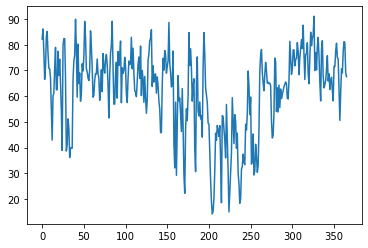

In [19]:
ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'r'}})
#ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb")
gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())
print(gpi_bidim.isobaricInhPa.unique())

ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'r'}})
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','r']]
res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.r!=10512])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'r'].reset_index(drop=True))

Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
2020-01-01 850.0          90.0    -180.0          0 0 days 2020-01-01   
                                  -177.5          0 0 days 2020-01-01   
                                  -175.0          0 0 days 2020-01-01   
                                  -172.5          0 0 days 2020-01-01   
                                  -170.0          0 0 days 2020-01-01   
...                                             ...    ...        ...   
2020-12-31 200.0         -90.0     167.5          0 0 days 2020-12-31   
                                   170.0          0 0 days 2020-12-31   
                                   172.5          0 0 days 2020-12-31   
                                   175.0          0 0 days 2020-12-31   
                                   177.5          0 0 days 2020-12-31   

                                                  

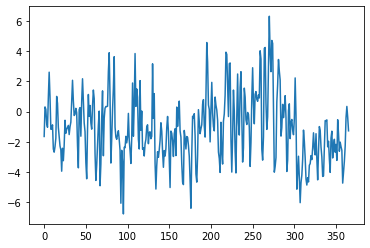

In [22]:
ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
#ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb")
gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())

ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','u']]

res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.u!=10512])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'u'].reset_index(drop=True))

Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
2020-01-01 850.0          90.0    -180.0          0 0 days 2020-01-01   
                                  -177.5          0 0 days 2020-01-01   
                                  -175.0          0 0 days 2020-01-01   
                                  -172.5          0 0 days 2020-01-01   
                                  -170.0          0 0 days 2020-01-01   
...                                             ...    ...        ...   
2020-12-31 200.0         -90.0     167.5          0 0 days 2020-12-31   
                                   170.0          0 0 days 2020-12-31   
                                   172.5          0 0 days 2020-12-31   
                                   175.0          0 0 days 2020-12-31   
                                   177.5          0 0 days 2020-12-31   

                                                  

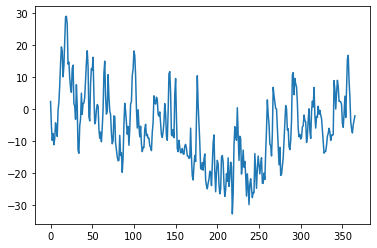

In [23]:
ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
#ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb")
gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())

ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'u'}})
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','u']]

res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.u!=10512])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'u'].reset_index(drop=True))

Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
2020-01-01 850.0          90.0    -180.0          0 0 days 2020-01-01   
                                  -177.5          0 0 days 2020-01-01   
                                  -175.0          0 0 days 2020-01-01   
                                  -172.5          0 0 days 2020-01-01   
                                  -170.0          0 0 days 2020-01-01   
...                                             ...    ...        ...   
2020-12-31 200.0         -90.0     167.5          0 0 days 2020-12-31   
                                   170.0          0 0 days 2020-12-31   
                                   172.5          0 0 days 2020-12-31   
                                   175.0          0 0 days 2020-12-31   
                                   177.5          0 0 days 2020-12-31   

                                                  

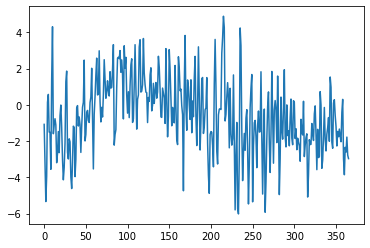

In [24]:
ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
#ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb")
gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())

ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==850.0,['time','latitude','longitude','v']]

res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.v!=10512])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'v'].reset_index(drop=True))

Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file
Ignoring index file '../data/20200101_20201231.grb.02ccc.idx' incompatible with GRIB file


                                             number   step valid_time  \
time       isobaricInhPa latitude longitude                             
2020-01-01 850.0          90.0    -180.0          0 0 days 2020-01-01   
                                  -177.5          0 0 days 2020-01-01   
                                  -175.0          0 0 days 2020-01-01   
                                  -172.5          0 0 days 2020-01-01   
                                  -170.0          0 0 days 2020-01-01   
...                                             ...    ...        ...   
2020-12-31 200.0         -90.0     167.5          0 0 days 2020-12-31   
                                   170.0          0 0 days 2020-12-31   
                                   172.5          0 0 days 2020-12-31   
                                   175.0          0 0 days 2020-12-31   
                                   177.5          0 0 days 2020-12-31   

                                                  

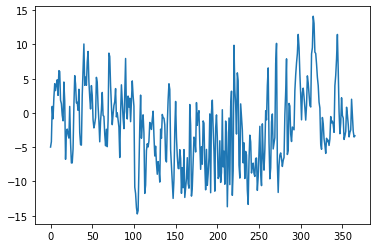

In [25]:
ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
#ds = xr.open_dataset("/Users/paolo/Documents/clint_datasets/2d_gpi_19800101_19800330.grb")
gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())

ds = xr.open_dataset("../data/20200101_20201231.grb", engine='cfgrib',backend_kwargs={'filter_by_keys': {'shortName': 'v'}})
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[gpi_bidim.isobaricInhPa==200.0,['time','latitude','longitude','v']]

res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.v!=10512])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'v'].reset_index(drop=True))

# 2) SST

1 variabile, dati giornalieri per ciascuna combinazione latitudine-longitudine (10.512 diverse ma 6.990 non nulli, il resto è terraferma).

Ignoring index file '../data/2d_sst_trop_20200101_20201231.grb.923a8.idx' incompatible with GRIB file
Ignoring index file '../data/2d_sst_trop_20200101_20201231.grb.923a8.idx' incompatible with GRIB file


                               number   step  surface valid_time         sst
time       latitude longitude                                               
2020-01-01  90.0    -180.0          0 0 days      0.0 2020-01-01  271.460449
                    -177.5          0 0 days      0.0 2020-01-01  271.460449
                    -175.0          0 0 days      0.0 2020-01-01  271.460449
                    -172.5          0 0 days      0.0 2020-01-01  271.460449
                    -170.0          0 0 days      0.0 2020-01-01  271.460449
...                               ...    ...      ...        ...         ...
2020-12-31 -77.5     167.5          0 0 days      0.0 2020-12-31  273.418365
                     170.0          0 0 days      0.0 2020-12-31  273.374390
                     172.5          0 0 days      0.0 2020-12-31  273.551025
                     175.0          0 0 days      0.0 2020-12-31  273.336304
                     177.5          0 0 days      0.0 2020-12-31  273.126770

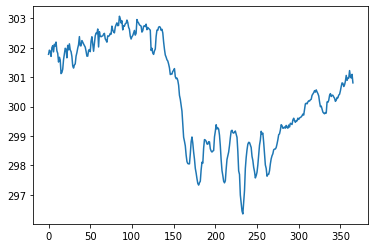

In [3]:
ds = xr.open_dataset("../data/2d_sst_trop_20200101_20201231.grb", engine='cfgrib')

gpi_bidim = ds.to_dataframe().dropna()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())
print(gpi_bidim.surface.unique())

ds = xr.open_dataset("../data/2d_sst_trop_20200101_20201231.grb", engine='cfgrib')
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','sst']]
res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.sst!=6990])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'sst'].reset_index(drop=True))

# 3) Top thermal radiation

1 variabile, dati giornalieri per ciascuna combinazione latitudine-longitudine (10.512 diverse).

Ignoring index file '../data/an_20200101_20201231_25.grb.923a8.idx' incompatible with GRIB file
Ignoring index file '../data/an_20200101_20201231_25.grb.923a8.idx' incompatible with GRIB file


                               number   step  surface valid_time         ttr
time       latitude longitude                                               
2020-01-01  90.0    0.0             0 1 days      0.0 2020-01-02 -168.839264
                    2.5             0 1 days      0.0 2020-01-02 -168.839264
                    5.0             0 1 days      0.0 2020-01-02 -168.910370
                    7.5             0 1 days      0.0 2020-01-02 -168.827408
                    10.0            0 1 days      0.0 2020-01-02 -168.756302
...                               ...    ...      ...        ...         ...
2020-12-31 -90.0    347.5           0 1 days      0.0 2021-01-01 -179.156662
                    350.0           0 1 days      0.0 2021-01-01 -179.132965
                    352.5           0 1 days      0.0 2021-01-01 -179.106293
                    355.0           0 1 days      0.0 2021-01-01 -179.064819
                    357.5           0 1 days      0.0 2021-01-01 -179.041107

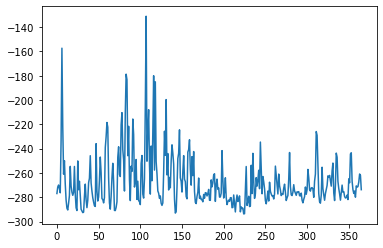

In [4]:
ds = xr.open_dataset("../data/an_20200101_20201231_25.grb", engine='cfgrib')

gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())
print(gpi_bidim.surface.unique())

ds = xr.open_dataset("../data/an_20200101_20201231_25.grb", engine='cfgrib')
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','ttr']]
res = gpi_bidim.groupby(['time']).count()
print(res)
print(res.loc[res.ttr!=10512])

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==0),'ttr'].reset_index(drop=True))

# 4) Target

1 variabile, dati giornalieri per ciascuna combinazione latitudine-longitudine (377 diverse) per ciascuno dei 14580 giorni dall'1-1-1980 all'1-12-2019. Valori: 5.485.668 volte è 0, 10.992 è 1.

Ignoring index file '../data/tcact_sin_year/actmask_hist_300km_17ms_sin_2019.grb.923a8.idx' incompatible with GRIB file
Ignoring index file '../data/tcact_sin_year/actmask_hist_300km_17ms_sin_2019.grb.923a8.idx' incompatible with GRIB file


                               number   step  surface valid_time  lsm
time       latitude longitude                                        
2019-01-01  0.0     20.0            0 0 days      0.0 2019-01-01  0.0
                    22.5            0 0 days      0.0 2019-01-01  0.0
                    25.0            0 0 days      0.0 2019-01-01  0.0
                    27.5            0 0 days      0.0 2019-01-01  0.0
                    30.0            0 0 days      0.0 2019-01-01  0.0
...                               ...    ...      ...        ...  ...
2019-12-01 -30.0    80.0            0 0 days      0.0 2019-12-01  0.0
                    82.5            0 0 days      0.0 2019-12-01  0.0
                    85.0            0 0 days      0.0 2019-12-01  0.0
                    87.5            0 0 days      0.0 2019-12-01  0.0
                    90.0            0 0 days      0.0 2019-12-01  0.0

[126295 rows x 5 columns]
[0]
[0]
[0.]
            latitude  longitude  lsm
time         

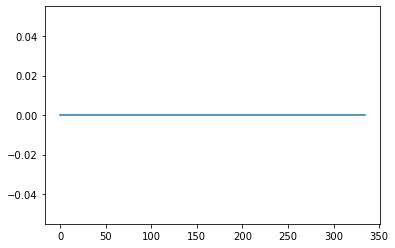

In [7]:
ds = xr.open_dataset("../data/tcact_sin_year/actmask_hist_300km_17ms_sin_2019.grb", engine='cfgrib')

gpi_bidim = ds.to_dataframe()
print(gpi_bidim)

print(gpi_bidim.step.unique())
print(gpi_bidim.number.unique())
print(gpi_bidim.surface.unique())

ds = xr.open_dataset("../data/tcact_sin_year/actmask_hist_300km_17ms_sin_2019.grb", engine='cfgrib')
gpi_bidim = ds.to_dataframe()
gpi_bidim = gpi_bidim.reset_index()
gpi_bidim = gpi_bidim.loc[:,['time','latitude','longitude','lsm']]
res = gpi_bidim.groupby(['time']).count()
print(res)

plt.plot(gpi_bidim.loc[(gpi_bidim.latitude==0) & (gpi_bidim.longitude==20),'lsm'].reset_index(drop=True))